#### Biblioteki

In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

#### Wczytanie danych

In [3]:
df = pd.read_csv("nyc-property-sales.csv")
df2 = pd.read_csv("nyc_pluto_24v4_1_csv/pluto_24v4_1.csv")

/var/folders/wk/w4dq25x94cg_26_p83q6tnlh0000gn/T/ipykernel_2652/1009523456.py:1: DtypeWarning: Columns (0,4,5,6,10,11,12,13,14,15,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("nyc-property-sales.csv")
/var/folders/wk/w4dq25x94cg_26_p83q6tnlh0000gn/T/ipykernel_2652/1009523456.py:2: DtypeWarning: Columns (21,22,24,26,28,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("nyc_pluto_24v4_1_csv/pluto_24v4_1.csv")


#### Przygotowanie zbiorow uzupelniajacych

Zillow Home Value Index (ZHVI): Miara typowej wartości domu i zmian rynkowych w danym regionie i typie nieruchomości. Odzwierciedla typową wartość domów w zakresie od 35 do 65 percentyla. Dostępny jako wygładzona, sezonowo dostosowana miara i jako surowa miara.
Zillow publikuje najwyższą kategorię ZHVI ($, typowa wartość domów mieszczących się w przedziale od 65. do 95. percentyla w danym regionie i najniższą kategorię ZHVI ($, typowa wartość domów mieszczących się w przedziale od 5. do 35. percentyla w danym regionie).

Zillow publikuje również ZHVI dla wszystkich domów jednorodzinnych ($, typowa wartość dla wszystkich domów jednorodzinnych w danym regionie), dla mieszkań/spółdzielni ($), dla wszystkich domów z 1, 2, 3, 4 i 5+ sypialniami ($).

In [42]:
try:
    zhvi = pd.read_csv('Zillow Home Value Index (ZHVI).csv', encoding='utf-8')
except UnicodeDecodeError:
    # If UTF-8 fails, try with latin1 encoding which is more permissive
    zhvi = pd.read_csv('Zillow Home Value Index (ZHVI).csv', encoding='latin1')
zhvi = zhvi[zhvi['RegionName'] == 'New York, NY']

In [43]:
zhvi

RegionID  SizeRank    RegionName RegionType StateName     1996-02-29  \
1    394913         1  New York, NY        msa        NY  178839.083603   

      1996-03-31     1996-04-30     1996-05-31     1996-06-30  ...  \
1  178102.403212  177931.478705  178156.253724  179019.844607  ...   

      2024-04-30     2024-05-31     2024-06-30     2024-07-31     2024-08-31  \
1  657326.220758  662123.024677  668457.679728  674647.182225  678702.852725   

      2024-09-30     2024-10-31     2024-11-30     2024-12-31     2025-01-31  
1  680776.316443  681340.968282  680789.479424  678745.091513  676722.943382  

[1 rows x 353 columns]

Zillow Observed Rent Index (ZORI) : Wygładzona miara typowej obserwowanej stawki czynszu rynkowego w danym regionie. ZORI to indeks czynszów powtarzalnych, który jest ważony do zasobu mieszkań na wynajem, aby zapewnić reprezentatywność na całym rynku, a nie tylko w domach obecnie wystawionych na wynajem. Indeks jest denominowany w dolarach poprzez obliczenie średniej czynszów wystawionych na sprzedaż, które mieszczą się w zakresie od 35. do 65. percentyla dla wszystkich domów i mieszkań w danym regionie, który jest ważony w celu odzwierciedlenia zasobu mieszkań na wynajem.

In [44]:
try:
    zori = pd.read_csv('Zillow Observed Rent Index (ZORI).csv', encoding='utf-8')
except UnicodeDecodeError:
    # If UTF-8 fails, try with latin1 encoding which is more permissive
    zori = pd.read_csv('Zillow Observed Rent Index (ZORI).csv', encoding='latin1')
zori = zori[zori['RegionName'] == 'New York, NY']

In [45]:
zori

RegionID  SizeRank    RegionName RegionType StateName   2015-01-31  \
1    394913         1  New York, NY        msa        NY  2228.858184   

    2015-02-28  2015-03-31   2015-04-30   2015-05-31  ...   2024-04-30  \
1  2243.256076  2261.29395  2281.172207  2296.311328  ...  3143.245728   

    2024-05-31  2024-06-30   2024-07-31  2024-08-31   2024-09-30   2024-10-31  \
1  3175.050337  3202.86273  3220.049879  3225.48366  3214.812955  3200.361087   

    2024-11-30   2024-12-31   2025-01-31  
1  3188.991173  3183.069329  3193.154605  

[1 rows x 126 columns]

Zillow Observed Renter Demand Index (ZORDI) : Miara typowego obserwowanego zaangażowania na rynku wynajmu w regionie. ZORDI śledzi zaangażowanie w oferty wynajmu Zillow, aby zrekompensować zmiany w popycie na wynajem. Metryka jest wygładzana w celu usunięcia zmienności.

In [46]:
zordi = pd.read_csv("Zillow Observed Renter Demand Index (ZORDI).csv", encoding='latin1')
zordi = zordi[zordi['RegionName'] == 'New York, NY']

In [47]:
zordi

RegionID  SizeRank    RegionName RegionType StateName  2020-06-30  \
1    394913         1  New York, NY        msa        NY        53.0   

   2020-07-31  2020-08-31  2020-09-30  2020-10-31  ...  2024-04-30  \
1        51.0        53.0        58.0        58.0  ...       113.0   

   2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  2024-10-31  \
1       111.0       108.0       106.0       102.0        97.0        90.0   

   2024-11-30  2024-12-31  2025-01-31  
1        81.0        84.0        96.0  

[1 rows x 61 columns]

Stan zapasów : Liczba unikalnych ofert, które były aktywne w dowolnym momencie w danym miesiącu

In [48]:
inventory = pd.read_csv("For-Sale Inventory.csv", encoding='latin1')
inventory = inventory[inventory['RegionName'] == 'New York, NY']

In [49]:
inventory

RegionID  SizeRank    RegionName RegionType StateName  2018-03-31  \
1    394913         1  New York, NY        msa        NY     73707.0   

   2018-04-30  2018-05-31  2018-06-30  2018-07-31  ...  2024-04-30  \
1     80345.0     85864.0     90067.0     91881.0  ...     38666.0   

   2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  2024-10-31  \
1     41641.0     43847.0     44838.0     43767.0     42694.0     41797.0   

   2024-11-30  2024-12-31  2025-01-31  
1     40396.0     37048.0     33607.0  

[1 rows x 88 columns]

In [50]:
new_listing = pd.read_csv("New Listings.csv", encoding='latin1')
new_listing = new_listing[new_listing['RegionName'] == 'New York, NY']

Nowe oferty:  wskazuje , ile nowych ofert pojawiło się na rynku w danym miesiącu.

In [51]:
new_listing

RegionID  SizeRank    RegionName RegionType StateName  2018-03-31  \
1    394913         1  New York, NY        msa        NY     20008.0   

   2018-04-30  2018-05-31  2018-06-30  2018-07-31  ...  2024-04-30  \
1     23619.0     24611.0     24612.0     22660.0  ...     12876.0   

   2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  2024-10-31  \
1     14404.0     14536.0     13778.0     12080.0     11601.0     11187.0   

   2024-11-30  2024-12-31  2025-01-31  
1     10406.0      8048.0      7249.0  

[1 rows x 88 columns]

Nowe oczekujące oferty : Liczba ofert, których status zmienił się ze „na sprzedaż” na „oczekujący” na stronie  Zillow.com  w danym okresie

In [52]:
new_pendly_listing = pd.read_csv("Newly Pending Listings.csv", encoding='latin1')
new_pendly_listing  = new_pendly_listing [new_pendly_listing ['RegionName'] == 'New York, NY']

In [53]:
new_pendly_listing


RegionID  SizeRank    RegionName RegionType StateName  2018-01-31  \
1    394913         1  New York, NY        msa        NY      3862.0   

   2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  2024-04-30  \
1      4582.0      5963.0      7309.0      7528.0  ...     10365.0   

   2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  2024-10-31  \
1     11102.0     10158.0     10237.0      9567.0      8236.0      9438.0   

   2024-11-30  2024-12-31  2025-01-31  
1      7628.0      6011.0      6093.0  

[1 rows x 90 columns]

Liczba sprzedaży (ostatnia wartość jest prognozowana obecnie): szacunkowa liczba unikalnych nieruchomości, które zostały sprzedane w danym miesiącu po uwzględnieniu opóźnienia między momentem dokonania sprzedaży a momentem jej zgłoszenia.

In [54]:
sales_count = pd.read_csv("Sales count.csv")
sales_count  = sales_count [sales_count ['RegionName'] == 'New York, NY']

In [55]:
sales_count

RegionID  SizeRank    RegionName RegionType StateName  2008-02-29  \
1    394913         1  New York, NY        msa        NY      8588.0   

   2008-03-31  2008-04-30  2008-05-31  2008-06-30  ...  2024-04-30  \
1      9074.0     10104.0     10498.0     11400.0  ...     11046.0   

   2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  2024-10-31  \
1     12369.0     12704.0     14361.0     14522.0     12171.0     12414.0   

   2024-11-30  2024-12-31  2025-01-31  
1     10582.0     12316.0      9916.0  

[1 rows x 209 columns]

Dni oczekiwania : Jak długo zajmuje domom w regionie zmiana statusu na oczekujący na  Zillow.com po pierwszym wyświetleniu jako na sprzedaż. Podana liczba wskazuje liczbę dni (średnią lub medianę), które zajęło domom, które były oczekujące w raportowanym tygodniu, aby stały się oczekujące. Różni się to od starej metryki „Dni na Zillow” tym, że wyklucza okres trwania umowy przed sprzedażą domu.

In [56]:
days_pending = pd.read_csv("Days to Pending.csv", encoding='latin1')
days_pending  = days_pending [days_pending ['RegionName'] == 'New York, NY']

In [57]:
days_pending

RegionID  SizeRank    RegionName RegionType StateName  2018-03-31  \
1    394913         1  New York, NY        msa        NY        68.0   

   2018-04-30  2018-05-31  2018-06-30  2018-07-31  ...  2024-04-30  \
1        65.0        63.0        64.0        66.0  ...        58.0   

   2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  2024-10-31  \
1        51.0        49.0        49.0        52.0        55.0        58.0   

   2024-11-30  2024-12-31  2025-01-31  
1        60.0        65.0        70.0  

[1 rows x 88 columns]

Wskaźnik ciepła rynkowego to szereg czasowy, którego celem jest uchwycenie równowagi podaży i popytu na sprzedaż na danym rynku. Wyższa liczba oznacza, że ​​rynek jest bardziej nastawiony na sprzedawców. Opiera się na połączeniu danych wejściowych dotyczących zaangażowania i wydajności ofert, aby zapewnić wgląd w bieżącą dynamikę rynku. Jest obliczany dla domów jednorodzinnych i mieszkań. Aby uzyskać więcej informacji, zapoznaj się z metodologią .

In [58]:
market_heat = pd.read_csv("market heat index.csv", encoding='latin1')
market_heat  = market_heat [market_heat ['RegionName'] == 'New York, NY']

In [59]:
market_heat

RegionID  SizeRank    RegionName RegionType StateName  2018-01-31  \
1    394913         1  New York, NY        msa        NY        52.0   

   2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  2024-04-30  \
1        52.0        55.0        56.0        55.0  ...        87.0   

   2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  2024-10-31  \
1        81.0        77.0        76.0        76.0        73.0        69.0   

   2024-11-30  2024-12-31  2025-01-31  
1        69.0        77.0        85.0  

[1 rows x 90 columns]

Liczba sprzedaży nowych konstrukcji: Liczba unikalnych nowych domów wybudowanych, które sprzedano w ciągu miesiąca. Dostępne dla surowego cięcia domów jednorodzinnych i mieszkań.

In [60]:
new_construction_sale = pd.read_csv("New Construction Sales Count.csv")
new_construction_sale  = new_construction_sale [new_construction_sale ['RegionName'] == 'New York, NY']

In [61]:
new_construction_sale

RegionID  SizeRank    RegionName RegionType StateName  2018-01-31  \
1    394913         1  New York, NY        msa        NY       530.0   

   2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  2024-03-31  \
1       454.0       556.0       517.0       607.0  ...       349.0   

   2024-04-30  2024-05-31  2024-06-30  2024-07-31  2024-08-31  2024-09-30  \
1       335.0       444.0       344.0       379.0       372.0       306.0   

   2024-10-31  2024-11-30  2024-12-31  
1       306.0       314.0       287.0  

[1 rows x 89 columns]

In [62]:

def transform_data(data):
    columns_to_keep = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
    value_columns = [col for col in data.columns if col not in columns_to_keep]

    data_melted = data.melt(
  
        value_vars=value_columns,
        var_name="Date", 
        value_name="data"
    )

   
    data_melted["Date"] = pd.to_datetime(data_melted["Date"])


    data_melted = data_melted.set_index("Date")
    
    return data_melted



In [63]:
data_to_transform = [zhvi, zori, zordi,inventory, new_listing, new_pendly_listing, days_pending, market_heat, new_construction_sale,sales_count]

In [64]:
zhvi, zori, zordi, inventory, new_listing, new_pendly_listing, days_pending, market_heat, new_construction_sale, sales_count = [transform_data(data) for data in data_to_transform]


In [65]:
combined_data = pd.concat([zhvi, zori, zordi, inventory, new_listing, new_pendly_listing, days_pending, market_heat, new_construction_sale, sales_count], axis=1)


In [66]:
combined_data

data         data  data     data     data    data  data  \
Date                                                                           
1996-02-29  178839.083603          NaN   NaN      NaN      NaN     NaN   NaN   
1996-03-31  178102.403212          NaN   NaN      NaN      NaN     NaN   NaN   
1996-04-30  177931.478705          NaN   NaN      NaN      NaN     NaN   NaN   
1996-05-31  178156.253724          NaN   NaN      NaN      NaN     NaN   NaN   
1996-06-30  179019.844607          NaN   NaN      NaN      NaN     NaN   NaN   
...                   ...          ...   ...      ...      ...     ...   ...   
2024-09-30  680776.316443  3214.812955  97.0  42694.0  11601.0  8236.0  55.0   
2024-10-31  681340.968282  3200.361087  90.0  41797.0  11187.0  9438.0  58.0   
2024-11-30  680789.479424  3188.991173  81.0  40396.0  10406.0  7628.0  60.0   
2024-12-31  678745.091513  3183.069329  84.0  37048.0   8048.0  6011.0  65.0   
2025-01-31  676722.943382  3193.154605  96.0  33607.0   7249.0  6093.0  70.0   

            data   data     data  
Date                              
1996-02-29   NaN    NaN      NaN  
1996-03-31   NaN    NaN      NaN  
1996-04-30   NaN    NaN      NaN  
1996-05-31   NaN    NaN      NaN  
1996-06-30   NaN    NaN      NaN  
...          ...    ...      ...  
2024-09-30  73.0  306.0  12171.0  
2024-10-31  69.0  306.0  12414.0  
2024-11-30  69.0  314.0  10582.0  
2024-12-31  77.0  287.0  12316.0  
2025-01-31  85.0    NaN   9916.0  

[348 rows x 10 columns]

In [67]:
combined_data.columns = ['zhvi', 'zori', 'zordi', 'inventory', 'new_listing', 'new_pendly_listing', 'days_pending', 'market_heat', 'new_construction_sale', 'sales_count']

In [68]:
combined_data.reset_index(inplace=True)

In [69]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   348 non-null    datetime64[ns]
 1   zhvi                   348 non-null    float64       
 2   zori                   119 non-null    float64       
 3   zordi                  56 non-null     float64       
 4   inventory              83 non-null     float64       
 5   new_listing            83 non-null     float64       
 6   new_pendly_listing     85 non-null     float64       
 7   days_pending           83 non-null     float64       
 8   market_heat            85 non-null     float64       
 9   new_construction_sale  84 non-null     float64       
 10  sales_count            203 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 30.0 KB


In [70]:
pkb = pd.read_excel('PKB.xlsx', sheet_name='PKB')
pkb.rename(columns={'observation_date': 'Date'}, inplace=True)
pkb

Date        GDP
0   1996-01-01   7868.468
1   1996-04-01   8032.840
2   1996-07-01   8131.408
3   1996-10-01   8259.771
4   1997-01-01   8362.655
..         ...        ...
111 2023-10-01  28296.967
112 2024-01-01  28624.069
113 2024-04-01  29016.714
114 2024-07-01  29374.914
115 2024-10-01  29719.647

[116 rows x 2 columns]

Stopy Bezrobocia i procentowe

In [71]:
nyur_refunds = pd.read_excel('NYUR Refunds.xlsx', sheet_name='Monthly')
nyur_refunds.rename(columns={'observation_date': 'Date'}, inplace=True)
nyur_refunds

Date  nyur  redfunds
0   1996-01-01   6.3      5.56
1   1996-02-01   6.3      5.22
2   1996-03-01   6.3      5.31
3   1996-04-01   6.3      5.22
4   1996-05-01   6.3      5.24
..         ...   ...       ...
345 2024-10-01   4.4      4.83
346 2024-11-01   4.4      4.64
347 2024-12-01   4.4      4.48
348 2025-01-01   NaN      4.33
349 2025-02-01   NaN      4.33

[350 rows x 3 columns]

In [72]:
combined_data

Date           zhvi         zori  zordi  inventory  new_listing  \
0   1996-02-29  178839.083603          NaN    NaN        NaN          NaN   
1   1996-03-31  178102.403212          NaN    NaN        NaN          NaN   
2   1996-04-30  177931.478705          NaN    NaN        NaN          NaN   
3   1996-05-31  178156.253724          NaN    NaN        NaN          NaN   
4   1996-06-30  179019.844607          NaN    NaN        NaN          NaN   
..         ...            ...          ...    ...        ...          ...   
343 2024-09-30  680776.316443  3214.812955   97.0    42694.0      11601.0   
344 2024-10-31  681340.968282  3200.361087   90.0    41797.0      11187.0   
345 2024-11-30  680789.479424  3188.991173   81.0    40396.0      10406.0   
346 2024-12-31  678745.091513  3183.069329   84.0    37048.0       8048.0   
347 2025-01-31  676722.943382  3193.154605   96.0    33607.0       7249.0   

     new_pendly_listing  days_pending  market_heat  new_construction_sale  \
0                   NaN           NaN          NaN                    NaN   
1                   NaN           NaN          NaN                    NaN   
2                   NaN           NaN          NaN                    NaN   
3                   NaN           NaN          NaN                    NaN   
4                   NaN           NaN          NaN                    NaN   
..                  ...           ...          ...                    ...   
343              8236.0          55.0         73.0                  306.0   
344              9438.0          58.0         69.0                  306.0   
345              7628.0          60.0         69.0                  314.0   
346              6011.0          65.0         77.0                  287.0   
347              6093.0          70.0         85.0                    NaN   

     sales_count  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
343      12171.0  
344      12414.0  
345      10582.0  
346      12316.0  
347       9916.0  

[348 rows x 11 columns]

In [73]:
median_income = pd.read_excel('Real Median Household Income in New York.xlsx', sheet_name='Annual')
median_income.rename(columns={'observation_date': 'Date'}, inplace=True)
median_income.rename(columns={'MEHOINUSNYA672N': 'median_income'}, inplace=True)
median_income

Date  median_income
0  1984-01-01          57910
1  1985-01-01          60100
2  1986-01-01          62600
3  1987-01-01          63840
4  1988-01-01          67470
5  1989-01-01          70400
6  1990-01-01          67340
7  1991-01-01          65390
8  1992-01-01          62290
9  1993-01-01          62040
10 1994-01-01          61100
11 1995-01-01          61800
12 1996-01-01          64560
13 1997-01-01          63900
14 1998-01-01          65850
15 1999-01-01          68990
16 2000-01-01          67950
17 2001-01-01          68680
18 2002-01-01          67600
19 2003-01-01          67520
20 2004-01-01          68730
21 2005-01-01          70580
22 2006-01-01          70110
23 2007-01-01          69380
24 2008-01-01          69000
25 2009-01-01          68940
26 2010-01-01          67420
27 2011-01-01          66510
28 2012-01-01          61440
29 2013-01-01          63620
30 2014-01-01          68180
31 2015-01-01          72870
32 2016-01-01          76500
33 2017-01-01          75310
34 2018-01-01          80700
35 2019-01-01          84940
36 2020-01-01          80320
37 2021-01-01          81660
38 2022-01-01          78920
39 2023-01-01          81600
40 2024-01-01          82200

In [74]:
cpi = pd.read_excel('CPI.xlsx', sheet_name='Annual')
cpi.rename(columns={'observation_date': 'Date'}, inplace=True)
cpi

Date      cpi
0  1996-01-01  2.93667
1  1997-01-01  2.33757
2  1998-01-01  1.54701
3  1999-01-01  2.19314
4  2000-01-01  3.36668
5  2001-01-01  2.81663
6  2002-01-01  1.59567
7  2003-01-01  2.29800
8  2004-01-01  2.66757
9  2005-01-01  3.36583
10 2006-01-01  3.22209
11 2007-01-01  2.87055
12 2008-01-01  3.81495
13 2009-01-01 -0.32036
14 2010-01-01  1.63657
15 2011-01-01  3.13965
16 2012-01-01  2.07319
17 2013-01-01  1.46597
18 2014-01-01  1.61546
19 2015-01-01  0.12114
20 2016-01-01  1.26736
21 2017-01-01  2.13144
22 2018-01-01  2.43900
23 2019-01-01  1.81326
24 2020-01-01  1.25294
25 2021-01-01  4.67912
26 2022-01-01  7.99264
27 2023-01-01  4.12772
28 2024-01-01  2.95161

In [75]:
def merge_data_montly(df1, df2, refund_column_name=''):

    df1['month_year'] = pd.to_datetime(df1['Date']).dt.to_period('M')
    df2['month_year'] = pd.to_datetime(df2['Date']).dt.to_period('M')

 
    refund_dict = df2.set_index('month_year')[refund_column_name].to_dict()

   
    df1[refund_column_name] = df1['month_year'].map(refund_dict)

    df1.drop('month_year', axis=1, inplace=True)

    return df1
combined_data = merge_data_montly(combined_data, nyur_refunds, 'nyur')
combined_data = merge_data_montly(combined_data, nyur_refunds, 'redfunds')

In [76]:
combined_data

Date           zhvi         zori  zordi  inventory  new_listing  \
0   1996-02-29  178839.083603          NaN    NaN        NaN          NaN   
1   1996-03-31  178102.403212          NaN    NaN        NaN          NaN   
2   1996-04-30  177931.478705          NaN    NaN        NaN          NaN   
3   1996-05-31  178156.253724          NaN    NaN        NaN          NaN   
4   1996-06-30  179019.844607          NaN    NaN        NaN          NaN   
..         ...            ...          ...    ...        ...          ...   
343 2024-09-30  680776.316443  3214.812955   97.0    42694.0      11601.0   
344 2024-10-31  681340.968282  3200.361087   90.0    41797.0      11187.0   
345 2024-11-30  680789.479424  3188.991173   81.0    40396.0      10406.0   
346 2024-12-31  678745.091513  3183.069329   84.0    37048.0       8048.0   
347 2025-01-31  676722.943382  3193.154605   96.0    33607.0       7249.0   

     new_pendly_listing  days_pending  market_heat  new_construction_sale  \
0                   NaN           NaN          NaN                    NaN   
1                   NaN           NaN          NaN                    NaN   
2                   NaN           NaN          NaN                    NaN   
3                   NaN           NaN          NaN                    NaN   
4                   NaN           NaN          NaN                    NaN   
..                  ...           ...          ...                    ...   
343              8236.0          55.0         73.0                  306.0   
344              9438.0          58.0         69.0                  306.0   
345              7628.0          60.0         69.0                  314.0   
346              6011.0          65.0         77.0                  287.0   
347              6093.0          70.0         85.0                    NaN   

     sales_count  nyur  redfunds  
0            NaN   6.3      5.22  
1            NaN   6.3      5.31  
2            NaN   6.3      5.22  
3            NaN   6.3      5.24  
4            NaN   6.2      5.27  
..           ...   ...       ...  
343      12171.0   4.4      5.13  
344      12414.0   4.4      4.83  
345      10582.0   4.4      4.64  
346      12316.0   4.4      4.48  
347       9916.0   NaN      4.33  

[348 rows x 13 columns]

In [77]:
def merge_data_quarterly(df1, df2, refund_column_name=''):

    df1['quarter_year'] = pd.to_datetime(df1['Date']).dt.to_period('Q')
    df2['quarter_year'] = pd.to_datetime(df2['Date']).dt.to_period('Q')

 
    refund_dict = df2.set_index('quarter_year')[refund_column_name].to_dict()

   
    df1[refund_column_name] = df1['quarter_year'].map(refund_dict)

    df1.drop('quarter_year', axis=1, inplace=True)

    return df1
combined_data = merge_data_quarterly(combined_data, pkb, 'GDP')


In [78]:
def merge_data_yearly(df1, df2, refund_column_name=''):

    df1['year'] = pd.to_datetime(df1['Date']).dt.to_period('Y')
    df2['year'] = pd.to_datetime(df2['Date']).dt.to_period('Y')

 
    refund_dict = df2.set_index('year')[refund_column_name].to_dict()

   
    df1[refund_column_name] = df1['year'].map(refund_dict)

    df1.drop('year', axis=1, inplace=True)

    return df1
combined_data = merge_data_yearly(combined_data, median_income, 'median_income')
combined_data = merge_data_yearly(combined_data, cpi, 'cpi')

In [79]:
combined_data

Date           zhvi         zori  zordi  inventory  new_listing  \
0   1996-02-29  178839.083603          NaN    NaN        NaN          NaN   
1   1996-03-31  178102.403212          NaN    NaN        NaN          NaN   
2   1996-04-30  177931.478705          NaN    NaN        NaN          NaN   
3   1996-05-31  178156.253724          NaN    NaN        NaN          NaN   
4   1996-06-30  179019.844607          NaN    NaN        NaN          NaN   
..         ...            ...          ...    ...        ...          ...   
343 2024-09-30  680776.316443  3214.812955   97.0    42694.0      11601.0   
344 2024-10-31  681340.968282  3200.361087   90.0    41797.0      11187.0   
345 2024-11-30  680789.479424  3188.991173   81.0    40396.0      10406.0   
346 2024-12-31  678745.091513  3183.069329   84.0    37048.0       8048.0   
347 2025-01-31  676722.943382  3193.154605   96.0    33607.0       7249.0   

     new_pendly_listing  days_pending  market_heat  new_construction_sale  \
0                   NaN           NaN          NaN                    NaN   
1                   NaN           NaN          NaN                    NaN   
2                   NaN           NaN          NaN                    NaN   
3                   NaN           NaN          NaN                    NaN   
4                   NaN           NaN          NaN                    NaN   
..                  ...           ...          ...                    ...   
343              8236.0          55.0         73.0                  306.0   
344              9438.0          58.0         69.0                  306.0   
345              7628.0          60.0         69.0                  314.0   
346              6011.0          65.0         77.0                  287.0   
347              6093.0          70.0         85.0                    NaN   

     sales_count  nyur  redfunds        GDP  median_income      cpi  
0            NaN   6.3      5.22   7868.468        64560.0  2.93667  
1            NaN   6.3      5.31   7868.468        64560.0  2.93667  
2            NaN   6.3      5.22   8032.840        64560.0  2.93667  
3            NaN   6.3      5.24   8032.840        64560.0  2.93667  
4            NaN   6.2      5.27   8032.840        64560.0  2.93667  
..           ...   ...       ...        ...            ...      ...  
343      12171.0   4.4      5.13  29374.914        82200.0  2.95161  
344      12414.0   4.4      4.83  29719.647        82200.0  2.95161  
345      10582.0   4.4      4.64  29719.647        82200.0  2.95161  
346      12316.0   4.4      4.48  29719.647        82200.0  2.95161  
347       9916.0   NaN      4.33        NaN            NaN      NaN  

[348 rows x 16 columns]

#### Customowe funkcje

In [43]:
def to_lowercase_columns(dataframe):
    return dataframe.rename(columns=str.lower)

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

#### Początkowe czyszczenie i merge z NYC PLUTO

polaczylem dane z PLUTO 2024 - chat mowi ze: If you’re predicting past sale prices, using historical PLUTO versions (if available) would be better. However, if you only have the 2024 version, it can still provide useful (but slightly inaccurate) context for older sales.

In [44]:
df.head()

BOROUGH   NEIGHBORHOOD         BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0       1  ALPHABET CITY         01 ONE FAMILY DWELLINGS                    1   
1       1  ALPHABET CITY         02 TWO FAMILY DWELLINGS                    1   
2       1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                   2B   
3       1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                   2B   
4       1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                    2   

  BLOCK LOT EASE-MENT BUILDING CLASS AT PRESENT                    ADDRESS  \
0   374  46       NaN                        A4        347 EAST 4TH STREET   
1   377   1       NaN                        S2               110 AVENUE C   
2   373  16       NaN                        C1        326 EAST 4TH STREET   
3   373  17       NaN                        C1        328 EAST 4TH STREET   
4   376  54       NaN                        C4  719 EAST SIXTH STREET, 1B   

  APARTMENT NUMBER  ... RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS  \
0              NaN  ...               1.0              0.0         1.0   
1              NaN  ...               2.0              1.0         3.0   
2              NaN  ...              10.0              0.0        10.0   
3              NaN  ...              10.0              0.0        10.0   
4              NaN  ...              20.0              0.0        20.0   

  LAND SQUARE FEET GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0           2116.0            4400.0     1900.0                         1   
1           1502.0            2790.0     1901.0                         1   
2           2204.0            8625.0     1899.0                         2   
3           2204.0            8625.0     1900.0                         2   
4           2302.0            9750.0     1900.0                         2   

  BUILDING CLASS AT TIME OF SALE SALE PRICE            SALE DATE  
0                             A4     399000  2022-09-29 00:00:00  
1                             S2    2999999  2022-09-15 00:00:00  
2                             C1   16800000  2022-08-04 00:00:00  
3                             C1   16800000  2022-08-04 00:00:00  
4                             C4     158822  2022-09-27 00:00:00  

[5 rows x 21 columns]

In [45]:
df["SALE PRICE"].value_counts()

SALE PRICE
0           591822
10           16208
450000       10111
400000        9892
550000        9307
             ...  
62400000         1
4858351          1
9263015          1
38595759         1
94136            1
Name: count, Length: 114422, dtype: int64

In [46]:
df["SALE PRICE"] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df = df[df["SALE PRICE"] > 0]

In [47]:
df = to_lowercase_columns(df)

In [48]:
df.columns

Index(['borough', 'neighborhood', 'building class category',
       'tax class at present', 'block', 'lot', 'ease-ment',
       'building class at present', 'address', 'apartment number', ' zip code',
       'residential units', 'commercial units', 'total units',
       'land square feet', 'gross square feet', 'year built',
       'tax class at time of sale', 'building class at time of sale',
       'sale price', 'sale date'],
      dtype='object')

In [49]:
df2

borough  block   lot     cd    bct2020     bctcb2020  ct2010  cb2010  \
0           BK   7604    47  314.0  3075200.0  3.075200e+10  752.00  1004.0   
1           BK   1304     1  309.0  3032300.0  3.032300e+10  323.00  3002.0   
2           BK   1304    58  309.0  3032300.0  3.032300e+10  323.00  3001.0   
3           BK   1294     1  309.0  3032500.0  3.032500e+10  325.00  3000.0   
4           BK   1302     1  309.0  3032500.0  3.032500e+10  325.00  3001.0   
...        ...    ...   ...    ...        ...           ...     ...     ...   
858637      SI   6901   322  503.0  5020803.0  5.020803e+10  208.03  3011.0   
858638      BX   5891  1624  208.0  2033700.0  2.033700e+10  337.00  1001.0   
858639      BK   8126    64  318.0  3097000.0  3.097000e+10  970.00  2002.0   
858640      BX   5103  8900  212.0  2041400.0  2.041400e+10  414.00  4008.0   
858641      BK   6347    75  311.0  3029000.0  3.029000e+10  290.00  3000.0   

        schooldist  council  ...        appbbl     appdate  plutomapid  \
0             22.0     45.0  ...           NaN         NaN           1   
1             17.0     35.0  ...  3.013040e+09  10/20/1989           1   
2             17.0     35.0  ...           NaN         NaN           1   
3             17.0     35.0  ...  3.012940e+09  02/27/1989           1   
4             17.0     35.0  ...           NaN         NaN           1   
...            ...      ...  ...           ...         ...         ...   
858637        31.0     51.0  ...           NaN         NaN           3   
858638        10.0     11.0  ...           NaN         NaN           1   
858639        18.0     42.0  ...           NaN         NaN           3   
858640        11.0     11.0  ...           NaN         NaN           3   
858641        21.0     43.0  ...           NaN         NaN           1   

        firm07_flag  pfirm15_flag  version  dcpedited   latitude  longitude  \
0               NaN           NaN   24v4.1        NaN  40.625779 -73.953658   
1               NaN           NaN   24v4.1        NaN  40.664671 -73.956901   
2               NaN           NaN   24v4.1        NaN  40.665104 -73.955675   
3               NaN           NaN   24v4.1        NaN  40.666423 -73.958074   
4               NaN           NaN   24v4.1        NaN  40.665062 -73.958101   
...             ...           ...      ...        ...        ...        ...   
858637          NaN           NaN   24v4.1        NaN  40.526255 -74.205792   
858638          NaN           NaN   24v4.1        NaN  40.912689 -73.901004   
858639          NaN           NaN   24v4.1        NaN  40.647118 -73.909108   
858640          NaN           NaN   24v4.1        NaN  40.906355 -73.852509   
858641          NaN           NaN   24v4.1        NaN  40.603319 -73.995556   

       notes  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
858637   NaN  
858638   NaN  
858639   NaN  
858640   NaN  
858641   NaN  

[858642 rows x 92 columns]

In [50]:
df2.columns

Index(['borough', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
       'ltdheight', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
       'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
       'histdist', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'borocode', 'bbl', 'cond

In [51]:
df2["borough"].value_counts()

borough
QN    324625
BK    276404
SI    125496
BX     89530
MN     42587
Name: count, dtype: int64

In [52]:
borough_map = {
    'MN': 1, 'BX': 2, 'BK': 3, 'QN': 4, 'SI': 5
}

In [53]:
df2['borough'] = df2['borough'].map(borough_map)

In [54]:
df_renamed = df.rename(columns={"BOROUGH": "borough", "BLOCK": "block", "LOT": "lot"})

In [55]:
df_merged = df_renamed.merge(df2, on=['borough', 'block', 'lot'], how='left')
df_merged

borough   neighborhood         building class category  \
0             1  ALPHABET CITY         01 ONE FAMILY DWELLINGS   
1             1  ALPHABET CITY         02 TWO FAMILY DWELLINGS   
2             1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS   
3             1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS   
4             1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS   
...         ...            ...                             ...   
1417560       5        WOODROW      05 TAX CLASS 1 VACANT LAND   
1417561       5        WOODROW      05 TAX CLASS 1 VACANT LAND   
1417562       5        WOODROW      05 TAX CLASS 1 VACANT LAND   
1417563       5        WOODROW      05 TAX CLASS 1 VACANT LAND   
1417564       5        WOODROW              22 STORE BUILDINGS   

        tax class at present block  lot ease-ment building class at present  \
0                          1   374   46       NaN                        A4   
1                          1   377    1       NaN                        S2   
2                         2B   373   16       NaN                        C1   
3                         2B   373   17       NaN                        C1   
4                          2   376   54       NaN                        C4   
...                      ...   ...  ...       ...                       ...   
1417560                    1  6970   84       NaN                        A1   
1417561                    1  6970   85       NaN                        A1   
1417562                   1B  6970   86       NaN                        V0   
1417563                   1B  6970   87       NaN                        V0   
1417564                    4  7144  510       NaN                        K2   

                         address_x apartment number  ...        appbbl  \
0              347 EAST 4TH STREET              NaN  ...           NaN   
1                     110 AVENUE C              NaN  ...           NaN   
2              326 EAST 4TH STREET              NaN  ...           NaN   
3              328 EAST 4TH STREET              NaN  ...           NaN   
4        719 EAST SIXTH STREET, 1B              NaN  ...           NaN   
...                            ...              ...  ...           ...   
1417560         N/A LENEVAR AVENUE              NaN  ...  5.069700e+09   
1417561         N/A LENEVAR AVENUE              NaN  ...  5.069700e+09   
1417562         N/A LENEVAR AVENUE              NaN  ...  5.069700e+09   
1417563          96 LENEVAR AVENUE              NaN  ...  5.069700e+09   
1417564      3120 ARTHUR KILL ROAD              NaN  ...           NaN   

            appdate plutomapid firm07_flag pfirm15_flag version dcpedited  \
0               NaN        1.0         NaN          NaN  24v4.1       NaN   
1               NaN        1.0         NaN          1.0  24v4.1       NaN   
2               NaN        1.0         NaN          NaN  24v4.1       NaN   
3               NaN        1.0         NaN          NaN  24v4.1       NaN   
4               NaN        1.0         NaN          1.0  24v4.1       NaN   
...             ...        ...         ...          ...     ...       ...   
1417560  08/02/2021        1.0         NaN          NaN  24v4.1       NaN   
1417561  08/02/2021        1.0         NaN          NaN  24v4.1       NaN   
1417562  08/02/2021        1.0         NaN          NaN  24v4.1       NaN   
1417563  08/02/2021        1.0         NaN          NaN  24v4.1       NaN   
1417564         NaN        1.0         NaN          NaN  24v4.1       NaN   

          latitude  longitude  notes  
0        40.721716 -73.978275    NaN  
1        40.724184 -73.978458    NaN  
2        40.721673 -73.979299    NaN  
3        40.721642 -73.979227    NaN  
4        40.723270 -73.978191    NaN  
...            ...        ...    ...  
1417560  40.538983 -74.209426    NaN  
1417561  40.538917 -74.209408    NaN  
1417562  40.538851 -74.209390    NaN  
1417563  40.538785 -74.209375    NaN  
1417564  40.543367 -74.

In [56]:
df_merged["version"].value_counts()

version
24v4.1    1018815
Name: count, dtype: int64

Od chata - ktore kolumny do czego i czy useful:

In [57]:
columns_to_keep = [
    
    # Building Characteristics
    'bldgclass', 'landuse','proxcode', 'bsmtcode','assessland',
       'assesstot', 'exempttot','yearalter1', 'yearalter2', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
    
    # Location Factors
    'lottype', 'condono',

    #ESG
    'cd', "firm07_flag", "pfirm15_flag",

    # Community & Services
    'schooldist', 'council', 'firecomp', 'policeprct','healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
    'sanitsub',

    # Zoning & Land Use
    'zonedist1', 'zonedist2','overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3','ltdheight',

    #property
    'easements', 'ownertype',

    # Original Sales Data (Important for Target Variable)
    'borough', 'neighborhood', 'building class category',
       'tax class at present', 'block', 'lot', 'ease-ment',
       'building class at present', 'apartment number', ' zip code',
       'residential units', 'commercial units', 'total units',
       'land square feet', 'gross square feet', 'year built',
       'tax class at time of sale', 'building class at time of sale',
       'sale price', 'sale date'

]

columns_to_drop = [
    #more about location
    'lot', 'bct2020', 'bctcb2020', 'ct2010','cb2010', 'zipcode', 'address','splitzone','borocode', 'bbl',

    #more Zoning & Land use
    'zonedist3', 'zonedist4',

    # Administrative & Redundant
    'ownername',

    #information about the plot
    'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',  'irrlotcode',
    # Tax & Mapping Information (Not necessary for price prediction)
    'tract2010', 'xcoord', 'ycoord',
       'zonemap', 'zmcode', 'sanborn', 'taxmap',

    #other
    'edesignum', 'appbbl',
       'appdate', 'plutomapid', 'version',
       'dcpedited', 'latitude', 'longitude', 'notes']

In [58]:
df = df_merged[columns_to_keep]

In [59]:
df

bldgclass  landuse  proxcode  bsmtcode  assessland  assesstot  \
0              A4      1.0       3.0       1.0     16680.0    77760.0   
1              S2      4.0       0.0       0.0     89400.0   197280.0   
2              C1      2.0       3.0       0.0    297000.0  1264500.0   
3              C1      2.0       3.0       0.0    297000.0  1264500.0   
4              C4      2.0       3.0       2.0    150750.0   815400.0   
...           ...      ...       ...       ...         ...        ...   
1417560        A5      1.0       1.0       2.0     23220.0    46380.0   
1417561        A5      1.0       2.0       2.0     25080.0    45420.0   
1417562        A5      1.0       2.0       2.0     24900.0    46320.0   
1417563        A5      1.0       2.0       2.0     13980.0    46320.0   
1417564        K2      5.0       0.0       0.0    529650.0   809550.0   

         exempttot  yearalter1  yearalter2 landmark  ...  residential units  \
0              0.0      1989.0         0.0      NaN  ...                1.0   
1              0.0         0.0         0.0      NaN  ...                2.0   
2              0.0      2011.0         0.0      NaN  ...               10.0   
3              0.0      2011.0         0.0      NaN  ...               10.0   
4         815400.0      2009.0         0.0      NaN  ...               20.0   
...            ...         ...         ...      ...  ...                ...   
1417560        0.0      2022.0         0.0      NaN  ...                1.0   
1417561        0.0      2022.0         0.0      NaN  ...                1.0   
1417562        0.0      2021.0         0.0      NaN  ...                0.0   
1417563        0.0      2021.0         0.0      NaN  ...                0.0   
1417564        0.0         0.0         0.0      NaN  ...                0.0   

         commercial units  total units  land square feet  gross square feet  \
0                     0.0          1.0            2116.0             4400.0   
1                     1.0          3.0            1502.0             2790.0   
2                     0.0         10.0            2204.0             8625.0   
3                     0.0         10.0            2204.0             8625.0   
4                     0.0         20.0            2302.0             9750.0   
...                   ...          ...               ...                ...   
1417560               0.0          1.0            2603.0                0.0   
1417561               0.0          1.0            2551.0                0.0   
1417562               0.0          0.0            2597.0                0.0   
1417563               0.0          0.0            2644.0                0.0   
1417564               1.0          1.0           98116.0             7795.0   

         year built  tax class at time of sale  \
0            1900.0                          1   
1            1901.0                          1   
2            1899.0                          2   
3            1900.0                          2   
4            1900.0                          2   
...             ...                        ...   
1417560      2022.0                          1   
1417561         NaN                          1   
1417562      2023.0                          1   
1417563      2023.0                          1   
1417564      1977.0                          4   

         building class at time of sale  sale price            sale date  
0                                    A4    399000.0  2022-09-29 00:00:00  
1                                    S2   2999999.0  2022-09-15 00:00:00  
2                                    C1  16800000.0  2022-08-04 00:00:00  
3                                    C1  16800000.0  2022-08-04 00:00:00  
4                                    C4    158822.0  2022-09-27 00:00:00  
...                                 ...         ...                  ...  
1417560                              V0   1116638.0  2022-12-19 00:00:00  
1417561                         

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417565 entries, 0 to 1417564
Data columns (total 58 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   bldgclass                       1018766 non-null  object 
 1   landuse                         1017601 non-null  float64
 2   proxcode                        1018766 non-null  float64
 3   bsmtcode                        1018766 non-null  float64
 4   assessland                      1018766 non-null  float64
 5   assesstot                       1018766 non-null  float64
 6   exempttot                       1018766 non-null  float64
 7   yearalter1                      1018766 non-null  float64
 8   yearalter2                      1018766 non-null  float64
 9   landmark                        3981 non-null     object 
 10  builtfar                        1018556 non-null  float64
 11  residfar                        1018815 non-null  float64
 12  

In [61]:
df[df['landuse'].isna()].sample(10)

bldgclass  landuse  proxcode  bsmtcode  assessland  assesstot  \
1318663       NaN      NaN       NaN       NaN         NaN        NaN   
633289        NaN      NaN       NaN       NaN         NaN        NaN   
547684        NaN      NaN       NaN       NaN         NaN        NaN   
360212        NaN      NaN       NaN       NaN         NaN        NaN   
561086        NaN      NaN       NaN       NaN         NaN        NaN   
954553        NaN      NaN       NaN       NaN         NaN        NaN   
933340        NaN      NaN       NaN       NaN         NaN        NaN   
553599        NaN      NaN       NaN       NaN         NaN        NaN   
249079        NaN      NaN       NaN       NaN         NaN        NaN   
286970        NaN      NaN       NaN       NaN         NaN        NaN   

         exempttot  yearalter1  yearalter2 landmark  ...  residential units  \
1318663        NaN         NaN         NaN      NaN  ...                1.0   
633289         NaN         NaN         NaN      NaN  ...                1.0   
547684         NaN         NaN         NaN      NaN  ...                0.0   
360212         NaN         NaN         NaN      NaN  ...                1.0   
561086         NaN         NaN         NaN      NaN  ...                0.0   
954553         NaN         NaN         NaN      NaN  ...                1.0   
933340         NaN         NaN         NaN      NaN  ...                0.0   
553599         NaN         NaN         NaN      NaN  ...                1.0   
249079         NaN         NaN         NaN      NaN  ...                0.0   
286970         NaN         NaN         NaN      NaN  ...                1.0   

         commercial units  total units  land square feet  gross square feet  \
1318663               0.0          1.0            3400.0             1912.0   
633289                0.0          1.0               0.0                0.0   
547684                0.0          0.0            4992.0                0.0   
360212                0.0          1.0               0.0                0.0   
561086                0.0          1.0               0.0                0.0   
954553                0.0          1.0               0.0                0.0   
933340                0.0          0.0               0.0                0.0   
553599                0.0          1.0               0.0                0.0   
249079                1.0          1.0               0.0                0.0   
286970                0.0          1.0               0.0             1230.0   

         year built  tax class at time of sale  \
1318663      2021.0                          1   
633289       1989.0                          1   
547684          0.0                          4   
360212       1990.0                          1   
561086          0.0                          4   
954553       1955.0                          2   
933340          0.0                          2   
553599       2007.0                          2   
249079       2005.0                          4   
286970       2010.0                          2   

         building class at time of sale  sale price            sale date  
1318663                              A5    896060.0  2023-02-13 00:00:00  
633289                               R3    229000.0  2012-11-15 00:00:00  
547684                               Z9    475000.0  2014-05-06 00:00:00  
360212                               R3    340500.0  2017-09-11 00:00:00  
561086                               RG    300000.0  2013-06-20 00:00:00  
954553                               R4   9750000.0  2006-09-29 00:00:00  
933340                               R9    323000.0  2007-05-01 00:00:00  
553599                               R4   1873580.0  2013-02-14 00:00:00  
249079                               RS    462218.0  2018-12-28 00:00:00  
286970                               R4   1458000.0  2018-04-06 00:00:00  

[10 rows x 58 columns]

In [62]:
missing_landuse_count = df['landuse'].isna().sum()
df = df.dropna(subset=['landuse'])
df = df.reset_index(drop=True)

In [63]:
print(df.columns)
len(df.columns)

Index(['bldgclass', 'landuse', 'proxcode', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearalter1', 'yearalter2', 'landmark',
       'builtfar', 'residfar', 'commfar', 'facilfar', 'lottype', 'condono',
       'cd', 'firm07_flag', 'pfirm15_flag', 'schooldist', 'council',
       'firecomp', 'policeprct', 'healthcenterdistrict', 'healtharea',
       'sanitboro', 'sanitdistrict', 'sanitsub', 'zonedist1', 'zonedist2',
       'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3', 'ltdheight',
       'easements', 'ownertype', 'borough', 'neighborhood',
       'building class category', 'tax class at present', 'block', 'lot',
       'ease-ment', 'building class at present', 'apartment number',
       ' zip code', 'residential units', 'commercial units', 'total units',
       'land square feet', 'gross square feet', 'year built',
       'tax class at time of sale', 'building class at time of sale',
       'sale price', 'sale date'],
      dtype='object')


58

usuniecie duplikatow kolumn (bylo neighborhood)

In [64]:
df = df.loc[:, ~df.columns.duplicated()]
print(df.columns)
len(df.columns)

Index(['bldgclass', 'landuse', 'proxcode', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearalter1', 'yearalter2', 'landmark',
       'builtfar', 'residfar', 'commfar', 'facilfar', 'lottype', 'condono',
       'cd', 'firm07_flag', 'pfirm15_flag', 'schooldist', 'council',
       'firecomp', 'policeprct', 'healthcenterdistrict', 'healtharea',
       'sanitboro', 'sanitdistrict', 'sanitsub', 'zonedist1', 'zonedist2',
       'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3', 'ltdheight',
       'easements', 'ownertype', 'borough', 'neighborhood',
       'building class category', 'tax class at present', 'block', 'lot',
       'ease-ment', 'building class at present', 'apartment number',
       ' zip code', 'residential units', 'commercial units', 'total units',
       'land square feet', 'gross square feet', 'year built',
       'tax class at time of sale', 'building class at time of sale',
       'sale price', 'sale date'],
      dtype='object')


58

#### Analiza

In [65]:
df["neighborhood"].value_counts().head(20)

neighborhood
FLUSHING-NORTH               19579
UPPER EAST SIDE (79-96)      14119
UPPER EAST SIDE (59-79)      13849
BEDFORD STUYVESANT           13096
FOREST HILLS                 11600
EAST NEW YORK                11069
JACKSON HEIGHTS              10534
MIDTOWN WEST                 10092
MIDTOWN EAST                 10029
BAYSIDE                       9942
FLUSHING-NORTH                8701
BUSHWICK                      8694
RICHMOND HILL                 8623
BAY RIDGE                     8480
FLUSHING-SOUTH                8304
SO. JAMAICA-BAISLEY PARK      8141
SOUTH JAMAICA                 7867
UPPER WEST SIDE (59-79)       7789
GREENWICH VILLAGE-CENTRAL     7780
UPPER WEST SIDE (79-96)       7753
Name: count, dtype: int64

kolumny neighborhood i kombinację boroguh - block - lot zmapowałbym do współrzędnych, ew dodać tutaj jakiś ranking popularności typu ile w jakim było

In [66]:
df["building class category"].value_counts().head(30)

building class category
10  COOPS - ELEVATOR APARTMENTS                 179139
01  ONE FAMILY HOMES                            137254
02  TWO FAMILY HOMES                            118461
01 ONE FAMILY DWELLINGS                          86103
10 COOPS - ELEVATOR APARTMENTS                   77339
02 TWO FAMILY DWELLINGS                          62954
01  ONE FAMILY DWELLINGS                         46873
02  TWO FAMILY DWELLINGS                         38683
09  COOPS - WALKUP APARTMENTS                    35290
07  RENTALS - WALKUP APARTMENTS                  32395
03  THREE FAMILY HOMES                           30977
09 COOPS - WALKUP APARTMENTS                     16338
03 THREE FAMILY DWELLINGS                        15101
01 ONE FAMILY DWELLINGS                          13917
10 COOPS - ELEVATOR APARTMENTS                   11906
07 RENTALS - WALKUP APARTMENTS                   11009
02 TWO FAMILY DWELLINGS                          10496
03  THREE FAMILY DWELLINGS               

to pole bardzo duzo mowi o budynku, to klasyfika budynku w NYC - warto zmapowac odpowiednio i wykorzystac do klasyfikacji, pewnie jedna z wazniejszym zmiennych

In [67]:
df[["building class category", "building class at present", "building class at time of sale"]].sample(10)

building class category  \
769176   10  COOPS - ELEVATOR APARTMENTS                
686014   01  ONE FAMILY HOMES                           
843786   03  THREE FAMILY HOMES                         
450803   02  TWO FAMILY HOMES                           
861161   01  ONE FAMILY HOMES                           
607123   02  TWO FAMILY HOMES                           
286585   01  ONE FAMILY DWELLINGS                       
651604   02  TWO FAMILY HOMES                           
1012976                       01 ONE FAMILY DWELLINGS   
856884   21  OFFICE BUILDINGS                           

        building class at present building class at time of sale  
769176                         D4                             D4  
686014                         A2                             A2  
843786                         C0                             C0  
450803                         B2                             B2  
861161                         A1                             A1  
607123                         B1                             B1  
286585                         A1                             A1  
651604                         B1                             B1  
1012976                        A1                             A1  
856884                         O8                             O8

mamy jeszcze 2 inne kolumny ktore mowia mniej wiecej to samo

In [68]:
df["buidling_class_num"] = df["building class category"].apply(lambda row: row[:2])
df["changed_building_class"] = (df['building class at present'] != df['building class at time of sale']).astype(int)

In [69]:
df["buidling_class_num"].value_counts()

buidling_class_num
01    284147
10    268384
02    230594
03     58653
09     54201
07     45052
05     13081
22     11693
14      8696
29      6832
25      6432
08      6282
21      4711
31      4040
30      3856
27      3249
26      1510
06      1508
37      1194
41       660
23       621
32       567
33       517
35       372
36       211
38       207
34       114
18        59
13        53
39        33
40        28
11        17
04        11
28         6
15         3
43         2
46         2
24         2
45         1
Name: count, dtype: int64

In [70]:
df["changed_building_class"].value_counts()

changed_building_class
0    983818
1     33783
Name: count, dtype: int64

bardzo malo zmienilo ta klase

In [71]:
cramers_v(df["buidling_class_num"], df['building class at present'])

0.884674001199512

wysoka korelacja miedzy tymi dwoma kolumnami

In [72]:
df.columns

Index(['bldgclass', 'landuse', 'proxcode', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearalter1', 'yearalter2', 'landmark',
       'builtfar', 'residfar', 'commfar', 'facilfar', 'lottype', 'condono',
       'cd', 'firm07_flag', 'pfirm15_flag', 'schooldist', 'council',
       'firecomp', 'policeprct', 'healthcenterdistrict', 'healtharea',
       'sanitboro', 'sanitdistrict', 'sanitsub', 'zonedist1', 'zonedist2',
       'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3', 'ltdheight',
       'easements', 'ownertype', 'borough', 'neighborhood',
       'building class category', 'tax class at present', 'block', 'lot',
       'ease-ment', 'building class at present', 'apartment number',
       ' zip code', 'residential units', 'commercial units', 'total units',
       'land square feet', 'gross square feet', 'year built',
       'tax class at time of sale', 'building class at time of sale',
       'sale price', 'sale date', 'buidling_class_num',
       'changed_buildin

In [73]:
df["ease-ment"].value_counts()

ease-ment
     727921
E         2
Name: count, dtype: int64

In [74]:
df["apartment number"].value_counts()

apartment number
                675789
                 45319
6                 1767
4                 1595
8                  562
                 ...  
608                  1
PHB                  1
PH 1                 1
PH 2                 1
2L                   1
Name: count, Length: 360, dtype: int64

moze jako czy jest apartment czy nie ma?

In [75]:
df[" zip code"].value_counts()

 zip code
11375.0    18850
10314.0    16665
10312.0    16327
11234.0    16270
10306.0    14554
           ...  
11241.0        1
10046.0        1
10052.0        1
10169.0        1
10280.0        1
Name: count, Length: 234, dtype: int64

do usuniecia? ewentualnie sprawdzenie liczby powtorzen albo cos

<Axes: >

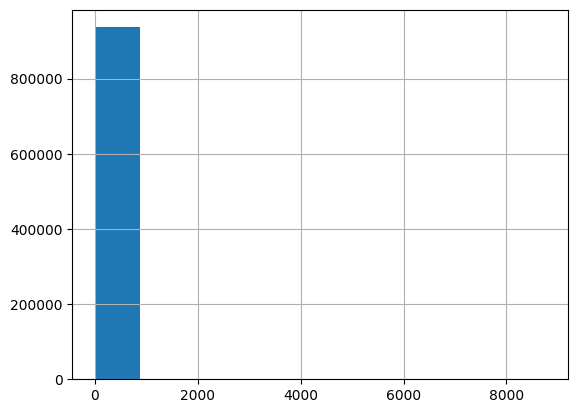

In [76]:
pd.to_numeric(df['residential units'], errors='coerce').hist()

In [77]:
import matplotlib.pyplot as plt

def create_hist_with_filter(data, lt, bins):
    filtered_units = data[data < lt]
    plt.figure(figsize=(12, 6))

    # Plot histogram with better styling
    plt.hist(filtered_units, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)

    plt.ylabel('Frequency', fontsize=12)

    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3)

    # Show plot
    plt.tight_layout()
    plt.show()

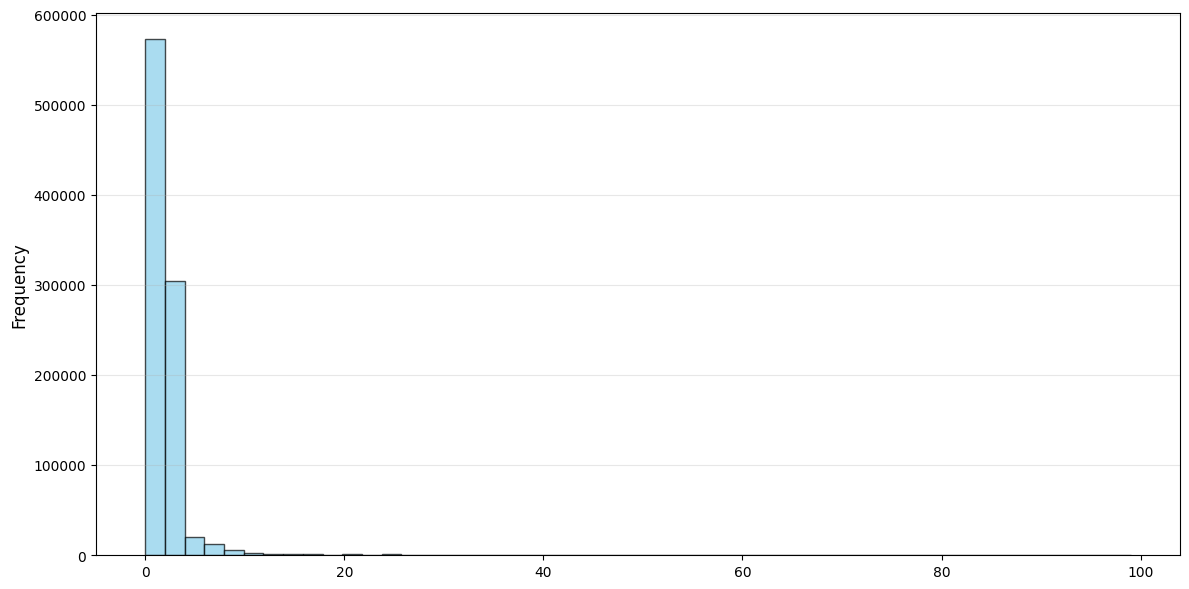

In [78]:
residential_units = pd.to_numeric(df['residential units'], errors='coerce')

create_hist_with_filter(residential_units, 100, 50)

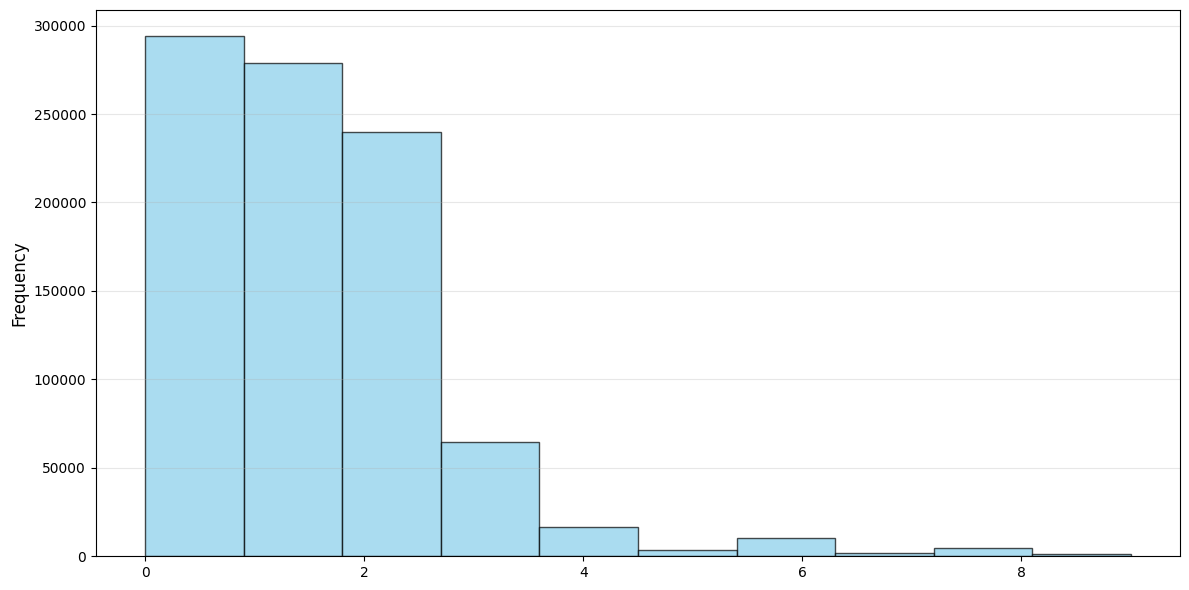

In [79]:
create_hist_with_filter(residential_units, 10, 10)

In [80]:
com_units = pd.to_numeric(df['commercial units'], errors='coerce')
tot_units = pd.to_numeric(df['total units'], errors='coerce')

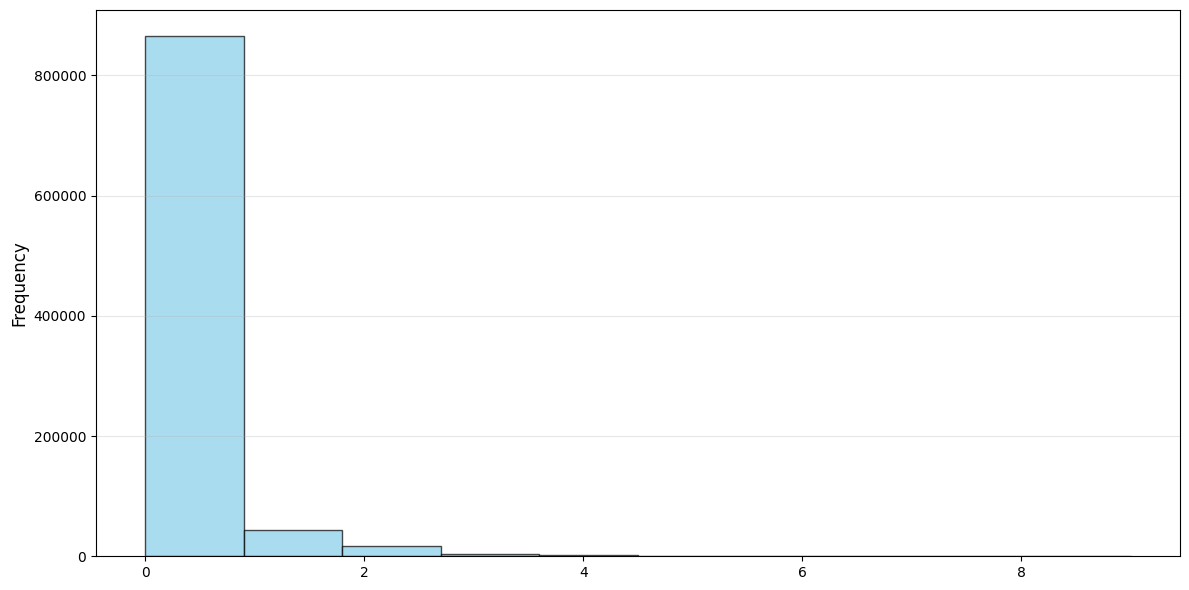

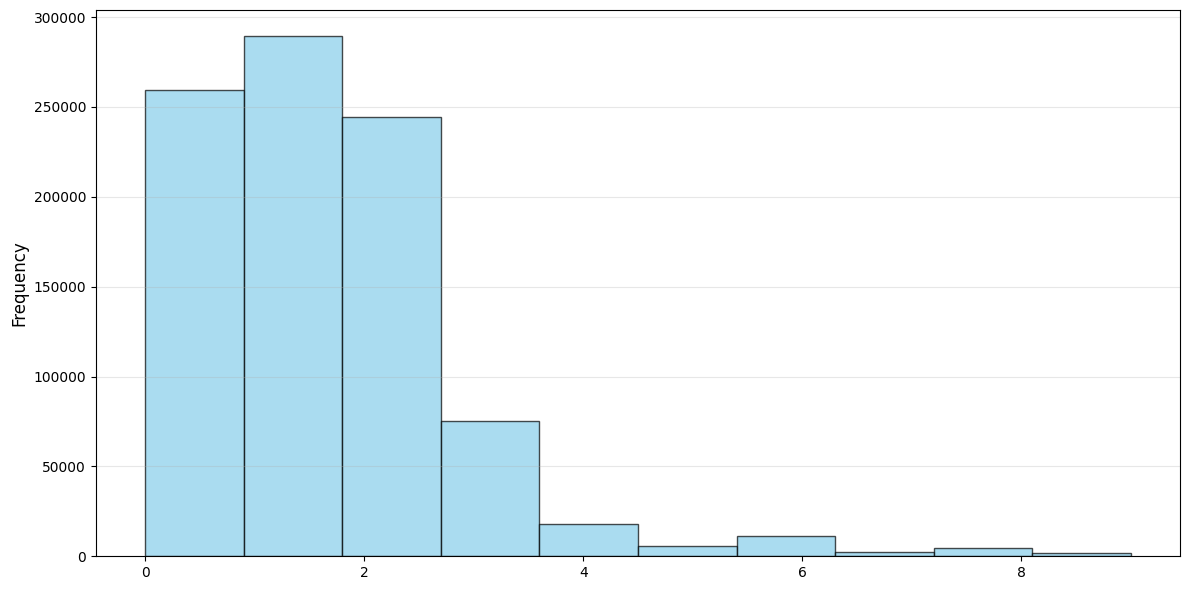

In [81]:
create_hist_with_filter(com_units, 10, 10)
create_hist_with_filter(tot_units, 10, 10)

tutaj proponuje 2 kolumny typu total units i np % udzialu commercial

In [82]:
df["land square feet"] = pd.to_numeric(df['land square feet'], errors='coerce')

In [83]:
pd.to_numeric(df['land square feet'], errors='coerce').value_counts()

land square feet
0.0         241914
2000.0       56584
2500.0       50804
4000.0       42228
3000.0       18780
             ...  
18618.0          1
19635.0          1
268092.0         1
9930.0           1
14983.0          1
Name: count, Length: 16384, dtype: int64

bardzo duzo 0 w powierzchni - moze uzupelnic innym zbiorem?

In [84]:
pd.to_numeric(df['gross square feet'], errors='coerce').value_counts()

gross square feet
0.0         260292
112850.0      7309
2400.0        5801
1600.0        5088
1800.0        5023
             ...  
11215.0          1
70592.0          1
9041.0           1
835279.0         1
12850.0          1
Name: count, Length: 18490, dtype: int64

to samo

<Axes: >

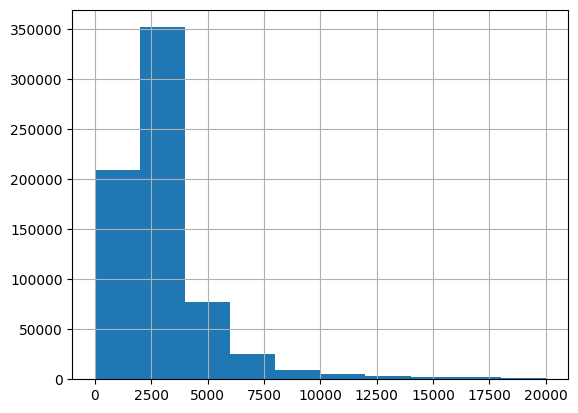

In [85]:
df[(df["land square feet"] != 0) & (df["land square feet"] <= 20000)]["land square feet"].hist()

In [86]:
df["year built"].value_counts()

year built
1920.0    90524
1930.0    74395
1925.0    64874
1910.0    49241
1950.0    48270
          ...  
1798.0        1
1867.0        1
1862.0        1
1821.0        1
1050.0        1
Name: count, Length: 203, dtype: int64

tez duzo pustych niestety

In [87]:
df["year built"] = pd.to_numeric(df['year built'], errors='coerce')

<Axes: >

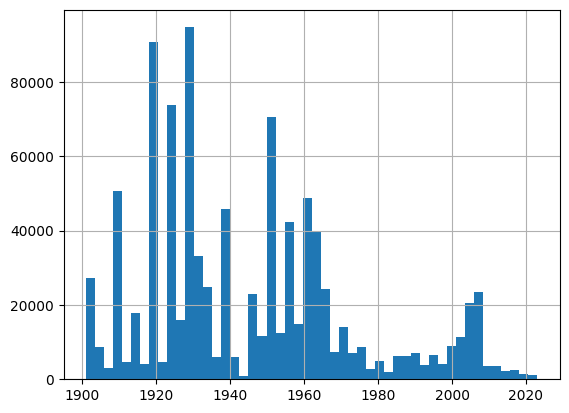

In [88]:
df[df["year built"]>1900]["year built"].hist(bins=50)

tutaj chyba fajnie rozlozone lata jak juz sa - moga duzo mowic

In [89]:
df["tax class at time of sale"].value_counts()

tax class at time of sale
1    587994
2    382688
4     46860
3        59
Name: count, dtype: int64

to chyba spoko - bez przerabiania

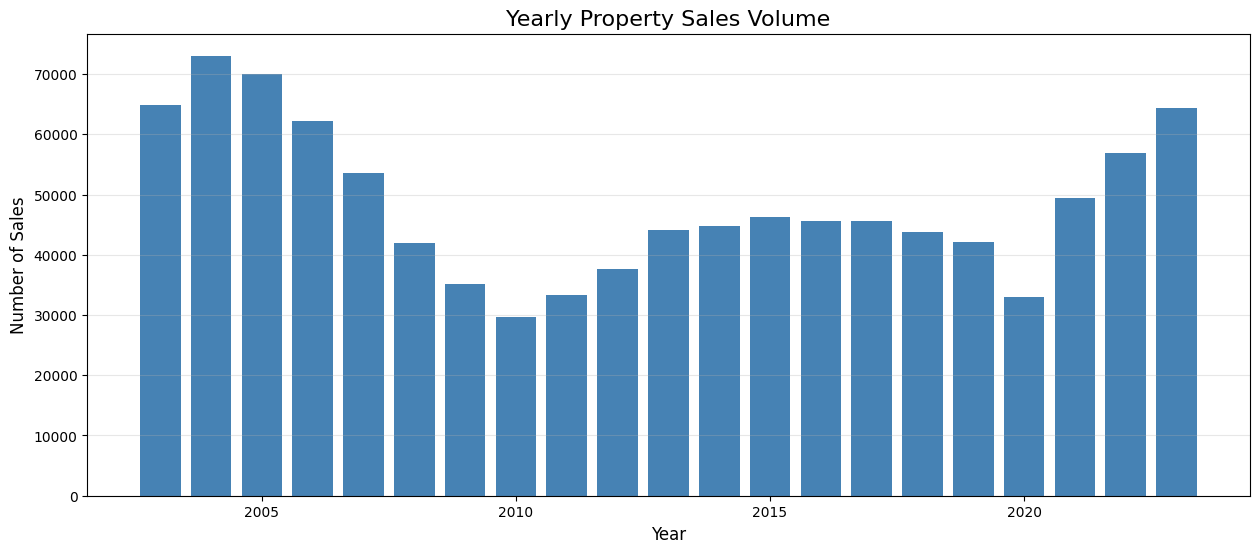

In [90]:
# Convert sale date to datetime if not already done
df["sale_date"] = pd.to_datetime(df["sale date"])

# Create yearly and monthly aggregations for different views
yearly_sales = df.groupby(df["sale_date"].dt.year)["sale_date"].count()
monthly_sales = df.groupby(pd.Grouper(key="sale_date", freq="M"))["sale_date"].count()

# Set up the figure with subplots for yearly and recent monthly trends
fig, ax1 = plt.subplots(1, 1, figsize=(15, 6))

# Plot yearly trend (all data)
ax1.bar(yearly_sales.index, yearly_sales.values, color='steelblue')
ax1.set_title("Yearly Property Sales Volume", fontsize=16)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Number of Sales", fontsize=12)
ax1.grid(axis='y', alpha=0.3)

In [111]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017601 entries, 0 to 1017600
Data columns (total 78 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   bldgclass                       1017601 non-null  object        
 1   landuse                         1017601 non-null  float64       
 2   proxcode                        1017601 non-null  float64       
 3   bsmtcode                        1017601 non-null  float64       
 4   assessland                      1017601 non-null  float64       
 5   assesstot                       1017601 non-null  float64       
 6   exempttot                       1017601 non-null  float64       
 7   yearalter1                      1017601 non-null  float64       
 8   yearalter2                      1017601 non-null  float64       
 9   landmark                        3981 non-null     object        
 10  builtfar                        1017392 no

In [115]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   348 non-null    datetime64[ns]
 1   zhvi                   348 non-null    float64       
 2   zori                   119 non-null    float64       
 3   zordi                  56 non-null     float64       
 4   inventory              83 non-null     float64       
 5   new_listing            83 non-null     float64       
 6   new_pendly_listing     85 non-null     float64       
 7   days_pending           83 non-null     float64       
 8   market_heat            85 non-null     float64       
 9   new_construction_sale  84 non-null     float64       
 10  sales_count            203 non-null    float64       
 11  nyur                   347 non-null    float64       
 12  redfunds               348 non-null    float64       
 13  GDP  

In [125]:
for column in combined_data.columns[1:]:
    monthly_counts = combined_data[combined_data[column].notnull()].groupby("Date")[column].count()
    # fig, ax = plt.subplots(figsize=(10, 6))
    # monthly_counts.plot(kind='bar', ax=ax)
    # n = 10
    # ticks = range(0, len(monthly_counts), n)
    # ax.set_xticks(ticks)
    # ax.set_xticklabels(monthly_counts.index.astype(str)[::n])
    # plt.xlabel('Month')
    # plt.ylabel('Count of non-NaN values')
    # plt.title(f'Monthly Count of {column} Values')
    # plt.tight_layout()
    # plt.show()
    print(column, monthly_counts.index[0])

zhvi 1996-02-29 00:00:00
zori 2015-01-31 00:00:00
zordi 2020-06-30 00:00:00
inventory 2018-03-31 00:00:00
new_listing 2018-03-31 00:00:00
new_pendly_listing 2018-01-31 00:00:00
days_pending 2018-03-31 00:00:00
market_heat 2018-01-31 00:00:00
new_construction_sale 2018-01-31 00:00:00
sales_count 2008-02-29 00:00:00
nyur 1996-02-29 00:00:00
redfunds 1996-02-29 00:00:00
GDP 1996-02-29 00:00:00
median_income 1996-02-29 00:00:00
cpi 1996-02-29 00:00:00


In [104]:
df["month_end"] = df["sale_date"] + pd.offsets.MonthEnd(0)
merged_df = df.merge(combined_data, left_on="month_end", right_on="Date", how="left")

In [126]:
merged_df["bldgclass_letter"] = merged_df["bldgclass"].apply(lambda row: row[0])

In [127]:
# Check all unique values in the bldgclass_letter column
print("Unique building class letters:", merged_df["bldgclass_letter"].unique())

# Count occurrences of each building class letter
letter_counts = merged_df["bldgclass_letter"].value_counts()
print("\nBuilding class letter counts:")
print(letter_counts)

# Filter dataframe to include only A, B, C, D, L building class letters
filtered_df = merged_df[merged_df["bldgclass_letter"].isin(['A', 'B', 'C', 'D', 'L'])]

# Show the shape of the filtered dataframe
print(f"\nFiltered dataframe shape: {filtered_df.shape}")

# Display the first few rows of the filtered dataframe
filtered_df.head()

Unique building class letters: ['A' 'S' 'C' 'D' 'G' 'B' 'O' 'K' 'H' 'E' 'N' 'R' 'V' 'P' 'I' 'M' 'W' 'Z'
 'J' 'F' 'Q' 'T' 'Y' 'U']

Building class letter counts:
bldgclass_letter
D    278633
A    266796
B    231718
C    162264
S     24513
K     12042
V     11676
H      8607
G      5869
O      5401
E      4017
F      2044
M      1292
W       817
I       515
N       304
P       269
Q       233
Z       198
U       156
J       107
R        92
T        28
Y        10
Name: count, dtype: int64

Filtered dataframe shape: (939411, 79)


bldgclass  landuse  proxcode  bsmtcode  assessland  assesstot  exempttot  \
0        A4      1.0       3.0       1.0     16680.0    77760.0        0.0   
2        C1      2.0       3.0       0.0    297000.0  1264500.0        0.0   
3        C1      2.0       3.0       0.0    297000.0  1264500.0        0.0   
4        C4      2.0       3.0       2.0    150750.0   815400.0   815400.0   
5        C7      4.0       3.0       2.0    122850.0  2337120.0        0.0   

   yearalter1  yearalter2 landmark  ...  days_pending  market_heat  \
0      1989.0         0.0      NaN  ...          53.0         61.0   
2      2011.0         0.0      NaN  ...          50.0         66.0   
3      2011.0         0.0      NaN  ...          50.0         66.0   
4      2009.0         0.0      NaN  ...          53.0         61.0   
5         0.0      2009.0      NaN  ...          50.0         66.0   

   new_construction_sale  sales_count  nyur  redfunds        GDP  \
0                  415.0      16754.0   3.9      2.56  26272.011   
2                  517.0      20756.0   3.8      2.33  26272.011   
3                  517.0      20756.0   3.8      2.33  26272.011   
4                  415.0      16754.0   3.9      2.56  26272.011   
5                  517.0      20756.0   3.8      2.33  26272.011   

   median_income      cpi  bldgclass_letter  
0        78920.0  7.99264                 A  
2        78920.0  7.99264                 C  
3        78920.0  7.99264                 C  
4        78920.0  7.99264                 C  
5        78920.0  7.99264                 C  

[5 rows x 79 columns]

In [129]:
filtered_df.to_csv("merged_data_2003.csv", index=False)

In [132]:
filtered_df[filtered_df["Date"]>="2018-03-31"].to_csv("merged_data_2018.csv", index=False)